In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape

(200000, 9)

In [4]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [7]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
col = {'Unnamed: 0': 'id'}

In [9]:
df.rename(columns=col, inplace= True)

In [10]:
df.head()

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df.dtypes

id                     int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [12]:
import datetime as dt

In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.dtypes

id                                 int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [15]:
df['hr'] = df['pickup_datetime'].dt.hour

In [16]:
df.head()

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hr
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17


In [17]:
import math

# Define the Haversine distance function
def haversine_distance(pickup_long, pickup_lat, dropoff_long, dropoff_lat):
    """
    Calculate the Haversine distance between two points on the earth (specified in decimal degrees).
    Returns the distance in kilometers.
    """
    # Convert decimal degrees to radians
    pickup_long, pickup_lat, dropoff_long, dropoff_lat = map(math.radians, [pickup_long, pickup_lat, dropoff_long, dropoff_lat])

    # Haversine formula
    dlon = dropoff_long - pickup_long
    dlat = dropoff_lat - pickup_lat
    a = math.sin(dlat/2)**2 + math.cos(pickup_lat) * math.cos(dropoff_lat) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of Earth in kilometers
    r = 6371

    # Calculate the result
    distance = c * r
    return distance

In [18]:
df.columns

Index(['id', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hr'],
      dtype='object')

In [19]:
# Apply the function to each row to calculate the distance
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_longitude'], row['pickup_latitude'],
                                                         row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [20]:
df.head()

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hr,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,4.475450


In [21]:
df.columns

Index(['id', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hr', 'distance'],
      dtype='object')

In [22]:
df.columns

Index(['id', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hr', 'distance'],
      dtype='object')

In [23]:
df.drop(['id', 'key', 'pickup_datetime',
         'pickup_longitude', 'pickup_latitude',
         'dropoff_longitude', 'dropoff_latitude',],axis = 1,
        inplace= True)

In [24]:
df.head()

,fare_amount,passenger_count,hr,distance
0,7.5,1,19,1.683323
1,7.7,1,20,2.457590
2,12.9,1,21,5.036377
3,5.3,3,8,1.661683
4,16.0,5,17,4.475450


### Remove wrong data

In [26]:
df.describe()

,fare_amount,passenger_count,hr,distance
count,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,1.684543,13.491387,20.855350
std,9.901760,1.385995,6.515505,382.964642
min,-52.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,1.215222
50%,8.500000,1.000000,14.000000,2.120992
75%,12.500000,2.000000,19.000000,3.875169
max,499.000000,208.000000,23.000000,16409.239135


In [27]:
# all these columns cannot be 0 or below 0

In [28]:
col_list = list(df.columns)

In [29]:
def clean(df, col_list):
    df_copy = df.copy()

    for col in col_list:
        df_copy = df_copy[df_copy[col] > 0] 

    return df_copy

In [30]:
df1 = clean(df, col_list)

In [31]:
df1.describe()

,fare_amount,passenger_count,hr,distance
count,186040.000000,186040.000000,186040.000000,186040.000000
mean,11.353241,1.687954,14.041475,21.057334
std,9.786951,1.390247,6.036659,383.266071
min,0.010000,1.000000,1.000000,0.000084
25%,6.000000,1.000000,10.000000,1.275127
50%,8.500000,1.000000,15.000000,2.169458
75%,12.500000,2.000000,19.000000,3.917827
max,499.000000,208.000000,23.000000,10321.507661


In [32]:
df1.shape

(186040, 4)

### Outliers

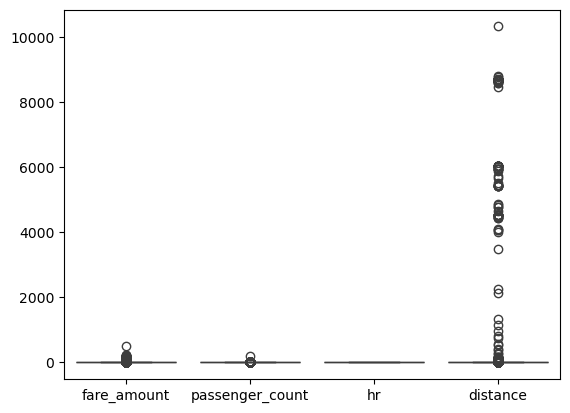

In [34]:
sns.boxplot(df1);

In [35]:
df1['distance'].max()

10321.50766127441

In [36]:
df1['distance'].min()

8.419568071893166e-05

In [37]:
# function for outlier removal from a dataframe

def outlier(df, col_list, iqr_factor):
    df_copy = df.copy()

    for col in col_list:
        q1 = np.percentile(df_copy[col], 25)
        q3 = np.percentile(df_copy[col], 75)

        iqr = q3 - q1

        ub = q3 + (iqr_factor * iqr)
        lb = q1 - (iqr_factor * iqr)

        # print('ub', ub, col)
        # print('lb', lb, col)
        # print()
        
        # filter 
        df_copy = df_copy[(df_copy[col] < ub) & (df_copy[col] > lb)]
        # print(df_copy[col].describe())

    # print(df_copy.describe())
    return df_copy

In [38]:
df2 = outlier(df1, col_list, 1.5)

In [39]:
df2['distance'].max()

6.436168505962344

In [40]:
df2.describe()

,fare_amount,passenger_count,hr,distance
count,143970.000000,143970.000000,143970.000000,143970.000000
mean,8.529230,1.262631,14.108182,2.268514
std,3.699821,0.541332,5.944834,1.409984
min,0.010000,1.000000,1.000000,0.000084
25%,5.700000,1.000000,10.000000,1.183274
50%,7.700000,1.000000,15.000000,1.916394
75%,10.500000,1.000000,19.000000,3.047993
max,22.100000,3.000000,23.000000,6.436169


In [41]:
df2.shape

(143970, 4)

### correlation

In [43]:
corr = df2.corr()

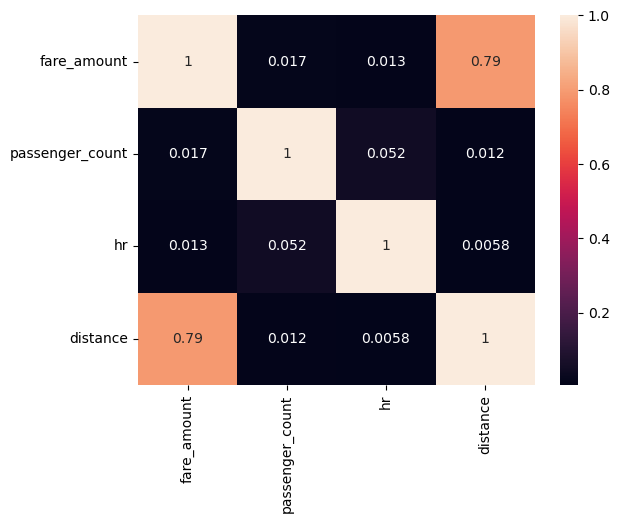

In [44]:
sns.heatmap(corr, annot = True);

### linear reg

In [47]:
df2.head()

,fare_amount,passenger_count,hr,distance
0,7.5,1,19,1.683323
1,7.7,1,20,2.457590
2,12.9,1,21,5.036377
3,5.3,3,8,1.661683
8,9.7,1,9,2.332711


In [48]:
x = df2.drop('fare_amount', axis = 1)
y = df2['fare_amount']

In [49]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
x_scaled = sca.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(x_test)
print('training acc:', lr.score(x_train, y_train))
print('testing acc:', lr.score(x_test, y_test))

training acc: 0.6313842557510941
testing acc: 0.6279401072744921


#### polynomial reg

In [139]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 17)
x_poly = poly.fit_transform(x_scaled)

In [140]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_poly, y,
                                                   random_state= 0)

In [141]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('training acc:', lr.score(x_train, y_train))
print('testing acc:', lr.score(x_test, y_test))

training acc: 0.6528902352127696
testing acc: 0.6447806531646586


#### Ridge Regression

In [146]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha = 10)
lr.fit(x_train, y_train)

Ridge(alpha=10)

In [147]:
y_pred = lr.predict(x_test)
print('training acc:', lr.score(x_train, y_train))
print('testing acc:', lr.score(x_test, y_test))

training acc: 0.6526091792208049
testing acc: 0.6448502852058352


### Lasso Regression

In [159]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha = 0.1)
lr.fit(x_train, y_train)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.990e+05, tolerance: 1.483e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [160]:
y_pred = lr.predict(x_test)
print('training acc:', lr.score(x_train, y_train))
print('testing acc:', lr.score(x_test, y_test))

training acc: 0.6416157422912954
testing acc: 0.6377105876964688
